## Structural Equation Model for Smoking example

$A \leftarrow Geom(p = 0.1) + 15$

$S \leftarrow 20 + \lfloor -0.2 \times A + \mathcal{N}(0,2) \rfloor$

$H \leftarrow 100 + \lfloor - 0.7 \times A - 0.8 \times S \rfloor$

In [168]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt

import scipy as sp
import numpy as np


n_samples = 1000

# Age (years) ~ geom(p=0.1, min = 15)
A = sp.stats.geom.rvs(p=0.1, loc=15, size=n_samples).reshape(-1,1) # data format for sklearn

# Smoke (cigarettes/day)
s_0 = 20
s_A = -0.2
S = s_0 + np.floor(s_A * A + sp.stats.norm.rvs(scale = 2, size = n_samples).reshape(-1,1))

# Health (Health Status \in [0,100])
h_0 = 100
h_A = -0.7
h_S = -0.8
H = h_0 + np.floor(h_A * A + h_S * S + sp.stats.norm.rvs(scale = 1, size = n_samples).reshape(-1,1))

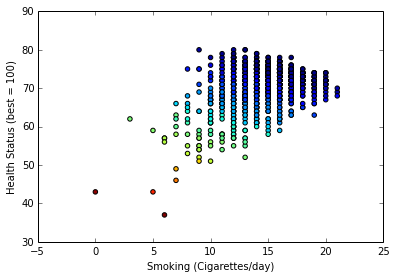

In [169]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.scatter(S,H, s=20,c=A, marker = 'o', cmap = cm.jet )

axes.set_ylabel('Health Status (best = 100)')
axes.set_xlabel('Smoking (Cigarettes/day)')

In [170]:
from sklearn import linear_model

# Uncontrolled for age
regr = linear_model.LinearRegression()
regr.fit(S, H)
b = regr.coef_
s = np.arange(0,25,1).reshape(-1,1)
h_pred = regr.predict(s)

# Young: A < 30
young = A<30

regr = linear_model.LinearRegression()
regr.fit(S[young, np.newaxis], H[young,np.newaxis])

b_young = regr.coef_
pred_young = regr.predict(s)

# Adult: 30 =< A < 50
adult = (30<=A) & (A <50)

regr = linear_model.LinearRegression()
regr.fit(S[adult, np.newaxis], H[adult, np.newaxis])

b_adult = regr.coef_
pred_adult = regr.predict(s)

# Senior: 50 =< A
adult = (50<=A)

regr = linear_model.LinearRegression()
regr.fit(S[senior, np.newaxis], H[senior, np.newaxis])

b_senior = regr.coef_
pred_senior = regr.predict(s)

# Multivariate
regr = linear_model.LinearRegression()
regr.fit(np.hstack((S,A)), H)

b_multivar = regr.coef_

('b_young =', array([[-0.3282749]]))


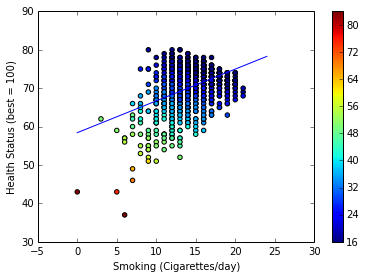

In [171]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(s,h_pred, label = 'Uncontrolled for age')

axes.set_ylabel('Health Status (best = 100)')
axes.set_xlabel('Smoking (Cigarettes/day)')
sc = axes.scatter(S,H, s=20,c=A, marker = 'o', cmap = cm.jet )
plt.colorbar(sc)

print ('b_young =', b_young)

In [175]:
b_senior

array([[ 1.34154351]])

In [154]:
s = np.arange(0,25,1).reshape(-1,1)



In [155]:
b_multivar

array([[-0.82624263, -0.70961801]])

In [149]:
np.hstack?

## Priors for age
### Gamma

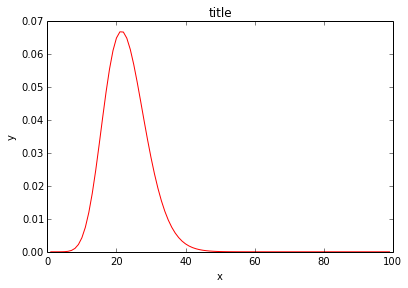

In [76]:
%matplotlib inline
from IPython.html.widgets import *

def plot_gamma(shape, scale, loc=0):
    fig = plt.figure()

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

    x = np.arange (1,100,1)
    y = sp.stats.gamma.pdf(x, shape,loc=loc, scale=scale)

    axes.plot(x, y, 'r')

    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_title('title');

interact(plot_gamma, shape = (0.1,20,0.1), scale = (0.1,20,0.1), loc = (-5,10,0.1))


### Geometric

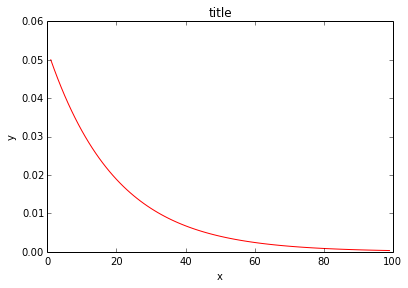

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import geom
from IPython.html.widgets import *

def plot_geom(p, loc=0):
    fig = plt.figure()

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

    x = np.arange (1,100,1)
    y = geom.pmf(x, p, loc)

    axes.plot(x, y, 'r')

    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_title('title');

interact(plot_geom, p = (0,1,0.01), loc = (0,100,1))